In [ ]:
SVM Example from sklearn documentation

In [ ]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

In [ ]:
# we will consider the first two features of the iris plant 
# we will only see and compare how the different kernel models split our plant 
# dataset so no need to train_test_split

# let's consider sepal length and sepal width

In [1]:
%matplotlib inline


# Plot different SVM classifiers in the iris dataset


Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.



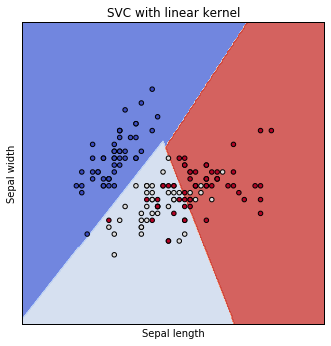

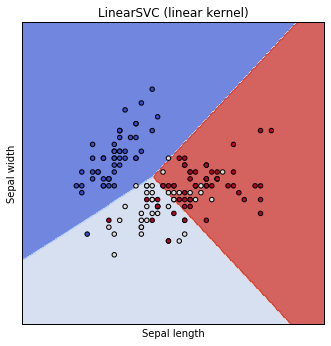

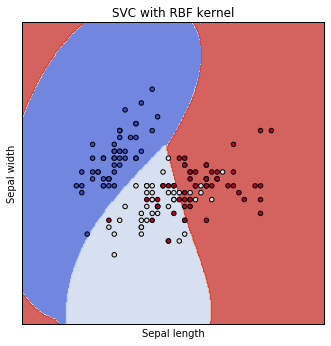

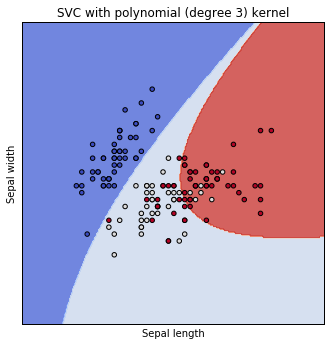

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

plt.figure(figsize=(18,18))
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


# lets set x_min and x_max
# take the first feature column and set the x_min and x_max from it

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create a mesh to plot in

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    # 1) plot decision boundry
    plt.figure(figsize=(13,13))
    
    #2) set the subplot position

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  # to adjust the subplots

    # def  z as our pred, c_ = transforms sliced objects into concatenation (formatting our predictn)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    #let's label
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# let's consider petal length and petal width

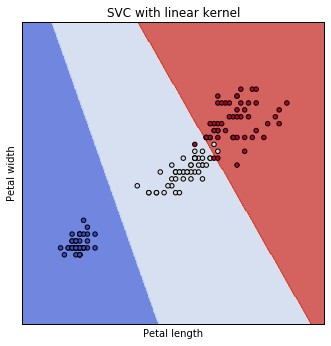

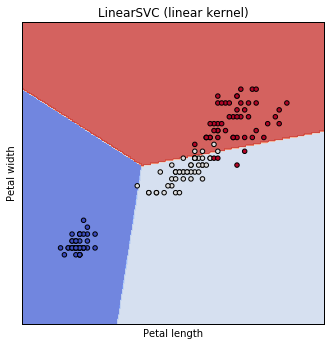

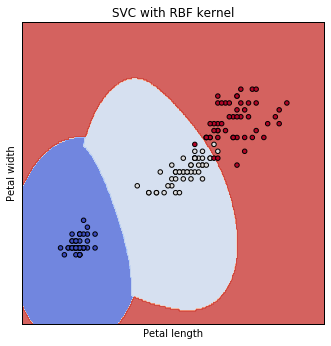

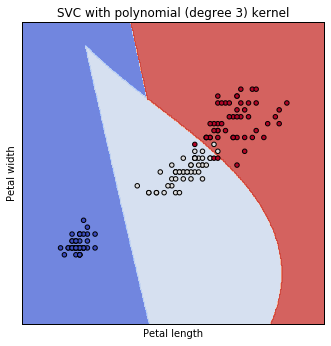

In [14]:
from sklearn import datasets
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # let's consider petal length and petal width
y = iris.target

#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



########################

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


# lets set x_min and x_max
# take the first feature column and set the x_min and x_max from it

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create a mesh to plot in

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    # 1) plot decision boundry
    plt.figure(figsize=(13,13))
    
    #2) set the subplot position

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  # to adjust the subplots

    # def  z as our pred, c_ = transforms sliced objects into concatenation (formatting our predictn)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    #let's label
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


# this is just a side note - not for lecture note

In [15]:
#
# two linear models, Gaussian Radial Basis Fn and SVC with a polynom. (3rd deg) Kernel
In [27]:

# SVC with Linear kernel
# Linear SVC
In [28]:

from sklearn import svm
In [29]:

x = iris.data[:,:2]
y = iris.target
In [30]:

C=1.0
In [31]:

svc = svm.SVC(kernel='linear', C=C).fit(x,y)
In [32]:

rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x,y)
In [33]:

poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x,y)
In [34]:

lin_svc = svm.LinearSVC(C=C).fit(x,y)
In [35]:

h=0.02
In [36]:

# lets set x_min and x_max
# take the first feature column and set the x_min and x_max from it
x_min = x[:,0].min()-1
x_max = x[:,0].max()+1
In [37]:

y_min = x[:,1].min()-1
y_max = x[:,1].max()+1
In [38]:

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
In [39]:

titles = ['SVC with linear kernel',
         'LinearSVC',
         'SVC with rbf kernel',
         'SVC with ploy degree 3 kernel']
In [42]:

for i, clf in enumerate((svc, lin_svc, rbf_svc,poly_svc)):
    
    # 1) plot decision boundry
    plt.figure(figsize=(13,13))
    
    #2) set the subplot position
    plt.subplot(2,2, i+1)
    
    #spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # def  z as pred, c_ = transforms sliced objects into concatenation (formatting our predictn)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #color plot
    z = z.reshape(xx.shape)
    
    #contour plot
    plt.contourf(xx, yy, z, cmap=plt.cm.terrain, alpha=0.4, linewidths=0)
    
    #plot training pt
    plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Dark2)
    
    #label
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
    
plt.show()
    

SyntaxError: invalid syntax (<ipython-input-15-d16bfac7953d>, line 3)